In [30]:
import nltk
import requests
import collections
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
testSentence = "The quick brown fox jumped over the lazy dogs." 
tokens = nltk.word_tokenize(testSentence)
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumped', 'VBD'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dogs', 'NNS'),
 ('.', '.')]

In [5]:
response = requests.get('https://raw.githubusercontent.com/JonathanReeve/course-computational-literary-analysis/gh-pages/_texts/garden-party.md')
gardenBook = response.text

In [6]:
gardenBook[:200]

'---\nlayout: narrative\ntitle: "The Garden Party and Other Stories" \nauthor: Katherine Mansfield\neditor: Jonathan Reeve\nrights: Public Domain\nsource: Project Gutenberg\npublication-date: 2019\ntoc:\n- At t'

In [7]:
gardenParts = gardenBook.split('2. THE GARDEN PARTY')

In [10]:
gardenParts[1][:200]

'.\n--------------------\n\nAnd after all the weather was ideal. They could not have had a more\nperfect day for a garden-party if they had ordered it. Windless, warm,\nthe sky without a cloud. Only the blu'

In [11]:
garden = gardenParts[1].split('3. THE DAUGHTERS OF THE LATE COLONEL')[0]

In [14]:
open('garden.md', 'w').write(garden)

29973

In [15]:
gardenTokens = nltk.word_tokenize(garden)

In [22]:
gardenTags = nltk.pos_tag(gardenTokens)

In [24]:
words = [pair[0] for pair in gardenTags]
tags = [pair[1] for pair in gardenTags]

In [29]:
collections.Counter(tags).most_common(20)

[('NN', 762),
 ('.', 604),
 ('DT', 536),
 ('PRP', 523),
 ('IN', 513),
 ('VBD', 512),
 (',', 438),
 ('RB', 391),
 ('JJ', 351),
 ('NNP', 287),
 ('VB', 233),
 ("''", 201),
 ('``', 193),
 ('CC', 189),
 ('NNS', 187),
 ('PRP$', 134),
 ('VBP', 119),
 ('TO', 118),
 ('VBN', 106),
 ('VBG', 103)]

In [46]:
counters = [collections.Counter(pile) for pile in np.array_split(np.array(tags), 20)]

In [47]:
df = pd.DataFrame(counters).fillna(0)

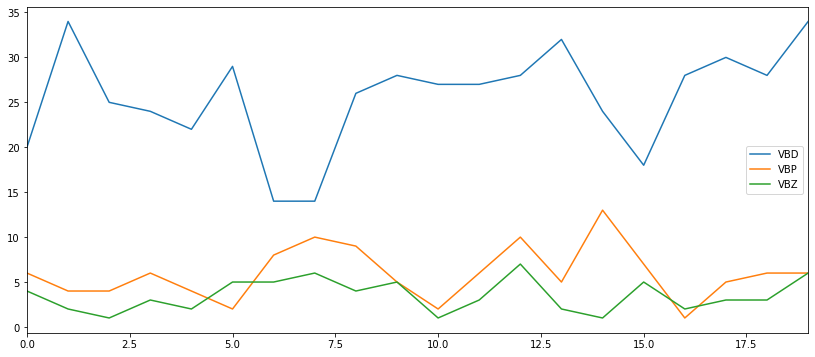

In [50]:
df[['VBD', 'VBP', 'VBZ']].plot(figsize=(14,6))

In [64]:
def inTheNN(pairs):
    """ This function takes (token, POS) pairs and 
        looks for patterns like "in the house." 
    """
    matches = []
    for i, pair in enumerate(pairs): 
        word = pair[0]
        pos = pair[1]
        if i<len(pairs)-2:
            nextWord = pairs[i+1][0]
            nextNextWord = pairs[i+2][0]
            nextNextPOS = pairs[i+2][1]
            if word == "in" and nextWord == "the" and nextNextPOS == 'NN': 
                matches.append([word, nextWord, nextNextWord])
    return matches

In [65]:
inTheNN(gardenTags)

[['in', 'the', 'direction'],
 ['in', 'the', 'eye'],
 ['in', 'the', 'eye'],
 ['in', 'the', 'house'],
 ['in', 'the', 'window'],
 ['in', 'the', 'effort'],
 ['in', 'the', 'lane'],
 ['in', 'the', 'garden'],
 ['in', 'the', 'mirror'],
 ['in', 'the', 'newspaper'],
 ['in', 'the', 'middle'],
 ['in', 'the', 'porch'],
 ['in', 'the', 'lane'],
 ['in', 'the', 'hollow'],
 ['in', 'the', 'gloom'],
 ['in', 'the', 'passage'],
 ['in', 'the', 'kitchen'],
 ['in', 'the', 'passage'],
 ['in', 'the', 'pillow']]

In [68]:
def simile(pairs):
    """ This function takes (token, POS) pairs and 
        looks for patterns like "like a XXXX." 
    """
    matches = []
    for i, pair in enumerate(pairs): 
        word = pair[0]
        pos = pair[1]
        if i<len(pairs)-2:
            nextWord = pairs[i+1][0]
            nextNextWord = pairs[i+2][0]
            nextNextPOS = pairs[i+2][1]
            if word == "like" and nextWord == "a": 
                matches.append([word, nextWord, nextNextWord])
    return matches

In [69]:
simile(gardenTags)

[['like', 'a', 'little'],
 ['like', 'a', 'marquee'],
 ['like', 'a', 'work-girl'],
 ['like', 'a', 'little'],
 ['like', 'a', 'logical'],
 ['like', 'a', 'picture'],
 ['like', 'a', 'shadow'],
 ['like', 'a', 'look']]

In [68]:
def simile(pairs):
    """ This function takes (token, POS) pairs and 
        looks for patterns like "like a XXXX." 
    """
    matches = []
    for i, pair in enumerate(pairs): 
        word = pair[0]
        pos = pair[1]
        if i<len(pairs)-2:
            nextWord = pairs[i+1][0]
            nextNextWord = pairs[i+2][0]
            nextNextPOS = pairs[i+2][1]
            if word == "like" and nextWord == "a": 
                matches.append([word, nextWord, nextNextWord])
    return matches

In [72]:
def jjn(pairs): 
    """ This function looks for adjective - adjective - noun
    constructions. """
    matches = []
    for i, pair in enumerate(pairs): 
        word0, pos0 = pair
        if i<len(pairs)-2:
            word1, pos1 = pairs[i+1]
            word2, pos2 = pairs[i+2]
            if pos0 == 'JJ' and pos1 == 'JJ' and pos2 == 'NN':
                matches.append([word0, word1, word2])
    return matches

In [73]:
jjn(gardenTags)

[['little', 'fat', 'chap'],
 ['little', 'silver', 'star'],
 ['long', 'sandwich', 'knife'],
 ['absorbed', 'inward', 'look'],
 ['long', 'black', 'velvet'],
 ['awkward', 'little', 'silence'],
 ['little', 'low', 'kitchen'],
 ['loud', 'childish', 'sob']]

In [75]:
adjectives = []
for pair in gardenTags: 
    word = pair[0]
    pos = pair[1]
    if pos.startswith('J'):
        adjectives.append(word)

In [83]:
collections.Counter(adjectives).most_common(20)

[('little', 23),
 ('big', 8),
 ('dark', 6),
 ('good', 6),
 ('tall', 5),
 ('last', 5),
 ('such', 5),
 ('young', 5),
 ('poor', 5),
 ('green', 4),
 ('right', 4),
 ('nice', 4),
 ('small', 4),
 ('same', 4),
 ('extravagant', 4),
 ('perfect', 3),
 ('garden-party', 3),
 ('dear', 3),
 ('better', 3),
 ('broad', 3)]